## Challenge 3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [4]:
df['ReleaseDate']=pd.to_datetime(df['ReleaseDate'])

In [5]:
df=df.sort_values(by=['ReleaseDate'])

Challenge 1: Plot Domestic Total Gross Over Time

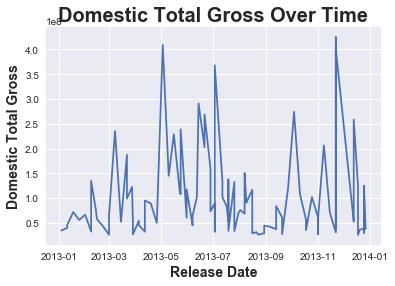

In [6]:
plt.plot(df['ReleaseDate'],df['DomesticTotalGross'])
plt.title('Domestic Total Gross Over Time',fontsize = 20,loc='center',weight = 'bold');
plt.xlabel('Release Date',fontsize = 14, weight = 'bold');
plt.ylabel('Domestic Total Gross',fontsize = 14, weight = 'bold');

Challenge 2: Plot Runtime versus Total Domestic Gross

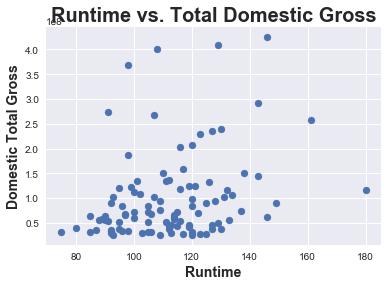

In [7]:
plt.scatter(df['Runtime'],df['DomesticTotalGross'])
plt.title('Runtime vs. Total Domestic Gross',fontsize = 20,loc='center',weight = 'bold');
plt.xlabel('Runtime',fontsize = 14, weight = 'bold');
plt.ylabel('Domestic Total Gross',fontsize = 14, weight = 'bold');

Challenge 3: Average Runtime and Domestic Total Gross for each Rating

In [8]:
groups = df.groupby('Rating').mean()
groups

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,9.393333e+07,1.311357e+08,99.933333
PG-13,9.660976e+07,1.114498e+08,117.510638
R,3.886364e+07,6.989243e+07,110.729730


In [9]:
test=df.loc[df['Rating'] == 'G']
test

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21


Challenge 4: Plot Release Date for Domestic Total Gross for each Rating

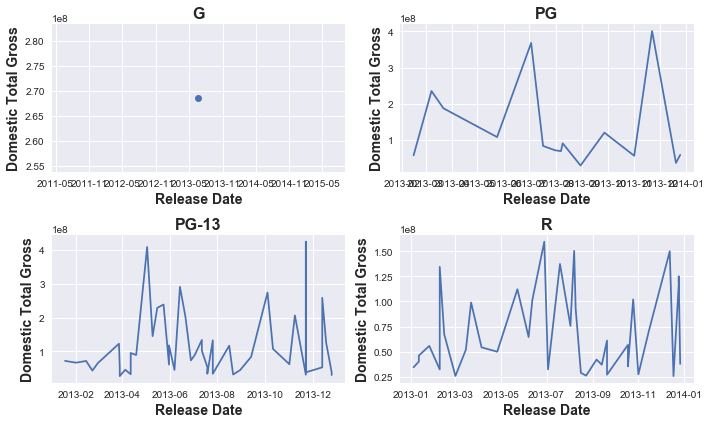

In [10]:
plt.figure(figsize=[10,6]);

#plt.suptitle('Release Date vs Domestic Total Growth for each Rating',fontsize = 20);

plt.subplot(2,2,1) # (number of rows, number of columns, number of plot)
plt.plot_date(df.loc[df['Rating'] == 'G']['ReleaseDate'],df.loc[df['Rating'] == 'G']['DomesticTotalGross']);
plt.xlabel('Release Date',fontsize = 14, weight = 'bold');
plt.ylabel('Domestic Total Gross',fontsize = 14, weight = 'bold');
plt.title('G',fontsize = 16, weight = 'bold');

plt.subplot(2,2,2);
plt.plot(df.loc[df['Rating'] == 'PG']['ReleaseDate'],df.loc[df['Rating'] == 'PG']['DomesticTotalGross']);
plt.xlabel('Release Date',fontsize = 14, weight = 'bold');
plt.ylabel('Domestic Total Gross',fontsize = 14, weight = 'bold');
plt.title('PG',fontsize = 16, weight = 'bold');

plt.subplot(2,2,3)
plt.plot(df.loc[df['Rating'] == 'PG-13']['ReleaseDate'],df.loc[df['Rating'] == 'PG-13']['DomesticTotalGross']);
plt.xlabel('Release Date',fontsize = 14, weight = 'bold');
plt.ylabel('Domestic Total Gross',fontsize = 14, weight = 'bold');
plt.title('PG-13',fontsize = 16, weight = 'bold');

plt.subplot(2,2,4);
plt.plot(df.loc[df['Rating'] == 'R']['ReleaseDate'],df.loc[df['Rating'] == 'R']['DomesticTotalGross']);
plt.xlabel('Release Date',fontsize = 14, weight = 'bold');
plt.ylabel('Domestic Total Gross',fontsize = 14, weight = 'bold');
plt.title('R',fontsize = 16, weight = 'bold');

plt.tight_layout()

Challenge 5: Find the director with the highest gross per movie (Answer: Francis Lawrence)

In [11]:
dirs = df.groupby('Director').mean()
dirs_max = dirs.loc[dirs['DomesticTotalGross'].argmax()]
dirs_max

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


Budget                130000000.0
DomesticTotalGross    424668047.0
Runtime                     146.0
Name: Francis Lawrence, dtype: float64

In [67]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25


In [47]:
df['ReleaseDate'][0].month

11

Challenge 6: Plot Domestic Total Gross for each month

In [12]:
month = df.set_index('ReleaseDate')
month.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
ReleaseDate,,,,,,
2013-01-04,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92
2013-01-11,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80
2013-01-11,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113
2013-01-18,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100
2013-01-25,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88


In [16]:
month2=month['DomesticTotalGross'].resample('M').mean()
month3=month['DomesticTotalGross'].resample('M').std()
month2 = pd.DataFrame(month2).reset_index()
month2['ReleaseDate']=pd.to_datetime(month2['ReleaseDate'])
type(month2['ReleaseDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
month3

ReleaseDate
2013-01-31    1.465947e+07
2013-02-28    3.283185e+07
2013-03-31    7.323942e+07
2013-04-30    2.530104e+07
2013-05-31    1.117754e+08
2013-06-30    9.519994e+07
2013-07-31    9.140837e+07
2013-08-31    4.132232e+07
2013-09-30    3.482327e+07
2013-10-31    9.394330e+07
2013-11-30    1.536011e+08
2013-12-31    6.683825e+07
Freq: M, Name: DomesticTotalGross, dtype: float64

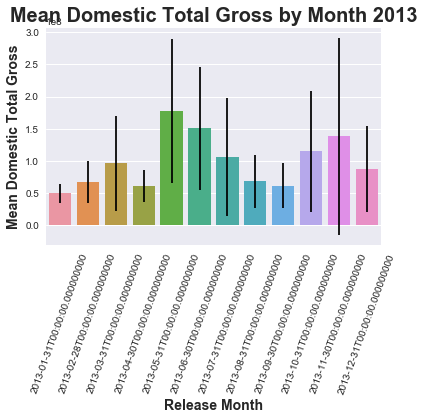

In [18]:
sns.barplot(x='ReleaseDate',y='DomesticTotalGross',data=month2,yerr=month3.values);
plt.title('Mean Domestic Total Gross by Month 2013',fontsize = 20,loc='center',weight = 'bold');
plt.xlabel('Release Month',fontsize = 14, weight = 'bold');
plt.ylabel('Mean Domestic Total Gross',fontsize = 14, weight = 'bold');
plt.xticks(rotation=70);